# Data (Preprocessing & Feature Engineering)

## Import Data

In [1]:
# import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
# import raw data
weather = pd.read_csv("weatherAUS5000.csv",index_col=0)
weather.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,2015-03-24,Adelaide,12.3,19.3,0.0,5.0,NaN,S,39.0,S,...,19.0,59.0,47.0,1022.2,1021.4,NaN,NaN,15.1,17.7,No
1,2011-07-12,Adelaide,7.9,11.4,0.0,1.0,0.5,N,20.0,NNE,...,7.0,70.0,59.0,1028.7,1025.7,NaN,NaN,8.4,11.3,No
2,2010-02-08,Adelaide,24.0,38.1,0.0,23.4,13.0,SE,39.0,NNE,...,19.0,36.0,24.0,1018.0,1016.0,NaN,NaN,32.4,37.4,No
3,2016-09-19,Adelaide,6.7,16.4,0.4,NaN,NaN,N,31.0,N,...,15.0,65.0,40.0,1014.4,1010.0,NaN,NaN,11.2,15.9,No
4,2014-03-05,Adelaide,16.7,24.8,0.0,6.6,11.7,S,37.0,S,...,24.0,61.0,48.0,1019.3,1018.9,NaN,NaN,20.8,23.7,No


## Train/Test Split

In [3]:
# split the dependent/independent variables
X = weather.iloc[:,:-1]
Y = weather.iloc[:,-1]

In [4]:
Y.isnull().sum() # no missing value in label

0

In [5]:
#explore the label classes
np.unique(Y) #binary classification

array(['No', 'Yes'], dtype=object)

In [6]:
# split train/test set
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.3,random_state=420) #solidify the random state

In [7]:
# reset the indexes of each data set
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [8]:
# encode the label
#Yes->1, No->2
from sklearn.preprocessing import LabelEncoder
encorder = LabelEncoder().fit(Ytrain)
# use training set to train the encoder, and apply the encoder on both training/testing set
Ytrain = pd.DataFrame(encorder.transform(Ytrain))
Ytest = pd.DataFrame(encorder.transform(Ytest))

## Preprocessing 1: Outliers

In [9]:
# use method 'describe' to explore outliers
Xtrain.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,3486.0,12.225645,6.396243,-6.5,-1.715,1.800,4.1,7.7,12.0,16.7,20.9,25.900,29.0
MaxTemp,3489.0,23.245543,7.201839,-3.7,8.888,12.840,14.5,18.0,22.5,28.4,33.0,40.400,46.4
Rainfall,3467.0,2.487049,7.949686,0.0,0.000,0.000,0.0,0.0,0.0,0.8,6.6,41.272,115.8
Evaporation,1983.0,5.619163,4.383098,0.0,0.400,0.800,1.4,2.6,4.8,7.4,10.2,20.600,56.0
Sunshine,1790.0,7.508659,3.805841,0.0,0.000,0.345,1.4,4.6,8.3,10.6,12.0,13.300,13.9
WindGustSpeed,3263.0,39.858413,13.219607,9.0,15.000,20.000,24.0,31.0,39.0,48.0,57.0,76.000,117.0
WindSpeed9am,3466.0,14.046163,8.670472,0.0,0.000,0.000,4.0,7.0,13.0,19.0,26.0,37.000,65.0
WindSpeed3pm,3437.0,18.553390,8.611818,0.0,2.000,6.000,7.0,13.0,19.0,24.0,30.0,43.000,65.0
Humidity9am,3459.0,69.069095,18.787698,2.0,18.000,35.000,45.0,57.0,70.0,83.0,94.0,100.000,100.0
Humidity3pm,3408.0,51.651995,20.697872,2.0,9.000,17.000,23.0,37.0,52.0,66.0,79.0,98.000,100.0


In [10]:
# use method 'describe' to explore outliers
Xtest.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
MinTemp,1493.0,11.916812,6.375377,-8.5,-2.024,1.600,3.70,7.3,11.8,16.5,20.48,25.316,28.3
MaxTemp,1498.0,22.906809,6.986043,-0.8,9.134,13.000,14.50,17.8,22.4,27.8,32.60,38.303,45.1
Rainfall,1483.0,2.241807,7.988822,0.0,0.000,0.000,0.00,0.0,0.0,0.8,5.20,35.372,108.2
Evaporation,858.0,5.657809,4.105762,0.0,0.400,1.000,1.60,2.8,4.8,7.6,10.40,19.458,38.8
Sunshine,781.0,7.677465,3.862294,0.0,0.000,0.300,1.50,4.7,8.6,10.7,12.20,13.400,13.9
WindGustSpeed,1406.0,40.044097,14.027052,9.0,15.000,20.000,24.00,30.0,39.0,48.0,57.00,78.000,122.0
WindSpeed9am,1483.0,13.986514,9.124337,0.0,0.000,0.000,4.00,7.0,13.0,20.0,26.00,39.360,72.0
WindSpeed3pm,1482.0,18.601215,8.850446,0.0,2.000,6.000,7.00,13.0,19.0,24.0,31.00,43.000,56.0
Humidity9am,1477.0,68.688558,18.876448,4.0,20.000,36.000,44.00,57.0,69.0,82.0,95.00,100.000,100.0
Humidity3pm,1472.0,51.431386,20.459957,2.0,8.710,18.000,23.00,37.0,52.0,66.0,78.00,96.290,100.0


Conclusion: No outlier in the dataset

## Feature Engineering 1: Feature Creation-"Rainfall"

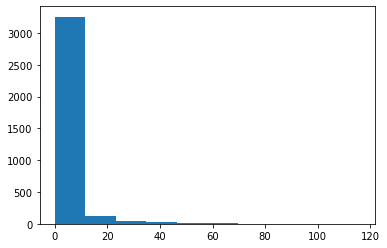

In [11]:
plt.hist(Xtrain.Rainfall)
plt.show()

In [12]:
#33 missing values
Xtrain["Rainfall"].isnull().sum()

33

In [13]:
# create a new col "RainToday"
Xtrain.loc[Xtrain["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtrain.loc[Xtrain["Rainfall"] < 1,"RainToday"] = "No"
Xtrain.loc[Xtrain["Rainfall"] == np.nan,"RainToday"] = np.nan

# operate similarly on test set
Xtest.loc[Xtest["Rainfall"] >= 1,"RainToday"] = "Yes"
Xtest.loc[Xtest["Rainfall"] < 1,"RainToday"] = "No"
Xtest.loc[Xtest["Rainfall"] == np.nan,"RainToday"] = np.nan

In [14]:
Xtrain.loc[:,"RainToday"].value_counts()

No     2642
Yes     825
Name: RainToday, dtype: int64

## Feature Engineering 2: Feature Extraction-"Month"

In [15]:
# we cannot treat it as categorical variables because there are 2141 difference classes
Xtrain.iloc[:,0].value_counts().count()

2141

In [16]:
# extract the month
Xtrain["Date"] = Xtrain["Date"].apply(lambda x:int(x.split("-")[1]))
# rename the column
Xtrain = Xtrain.rename(columns={"Date":"Month"})

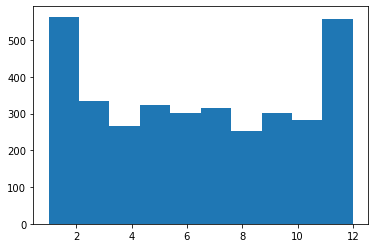

In [17]:
plt.hist(Xtrain.loc[:,"Month"])
plt.show()

In [18]:
# operate similarly on test set
Xtest["Date"] = Xtest["Date"].apply(lambda x:int(x.split("-")[1]))
Xtest = Xtest.rename(columns={"Date":"Month"})

## Feature Engineering 3: Feature Creation-"Climate"

In [19]:
# 49 distinct cities in training set, too many for one-hot encoding
Xtrain.loc[:,"Location"].value_counts().count()

49

### web crawler

In [20]:
# web crawler

# before running this code, a list, cityname, should be predefined

# import time
# from selenium import webdriver
# import pandas as pd
# import numpy as np

# df = pd.DataFrame(index = range(len(cityname)))
# driver = webdriver.Chrome()
# time0 = time.time() # tik

# for num, city in enumerate(cityname):    # go through all the cities in cityname
#     driver.get('https://google.com')    # open google first
#     time.sleep(0.3)   # stop for 0.3 second
#     serach_box = driver.find_element_by_name('q') # google search box
#     search_box.send_keys('%s Australia latitude and longitude' %city)   # input this sentence in the google search box
#     search_box.submit()     # press enter
#     result = driver.find_element_by_xpath('//div[@class="Z0Lcw"]').text  # get the result (it may vary from computer to computer)
#     resultsplit = result.split(' ')  # split the result
#     df.loc[num, 'City'] = city # the first col is city
#     df.loc[num, 'Latitude'] = resultsplit[0] # latitude
#     df.loc[num, 'Longitude'] = resultsplit[2] # longitude
#     df.loc[num, 'Latitudedir'] = resultsplit[1] # latitude direction
#     df.loc[num, 'Longitudedir'] = resultsplit[3] # longitude direction
#     print('%i webcrawler successful for city %s' %(num, city))   # monitor the progress

# time.sleep(1) # stop for 1 second
# driver.quit() # close the chrome
# print(time.time() - time0) # print the total running time

### Display the result of Web Crawler

In [21]:
# import the result of web crawler
cityll = pd.read_csv("cityll.csv",index_col=0)
city_climate = pd.read_csv("Cityclimate.csv")

In [22]:
# the latitude and longitude of the cities listing on the climate graph made by Australian Bureau of Meteorology
cityll.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Adelaide,34.9285°,138.6007°,"S,",E
1,Albany,35.0275°,117.8840°,"S,",E
2,Albury,36.0737°,146.9135°,"S,",E
3,Wodonga,36.1241°,146.8818°,"S,",E
4,AliceSprings,23.6980°,133.8807°,"S,",E


In [23]:
# the climate of the cities made by Australian Bureau of Meteorology
city_climate.head()

,City,Climate
0,Adelaide,Warm temperate
1,Albany,Mild temperate
2,Albury,"Hot dry summer, cool winter"
3,Wodonga,"Hot dry summer, cool winter"
4,AliceSprings,"Hot dry summer, warm winter"


### Combine cityll & city_climate

In [24]:
# remove the degree sign
cityll["Latitudenum"] = cityll["Latitude"].apply(lambda x:float(x[:-1]))
cityll["Longitudenum"] = cityll["Longitude"].apply(lambda x:float(x[:-1]))
# all the cities are in the Eastern Hemisphere and Southern Hemisphere
citylld = cityll.iloc[:,[0,5,6]]
citylld

,City,Latitudenum,Longitudenum
0,Adelaide,34.9285,138.6007
1,Albany,35.0275,117.8840
2,Albury,36.0737,146.9135
3,Wodonga,36.1241,146.8818
4,AliceSprings,23.6980,133.8807
...,...,...,...
95,Wollongong,34.4278,150.8931
96,Wyndham,15.4825,128.1228
97,Yalgoo,28.3445,116.6851
98,Yulara,25.2335,130.9849


In [25]:
# the climate of the cities made by Australian Bureau of Meteorology
city_climate.head()

,City,Climate
0,Adelaide,Warm temperate
1,Albany,Mild temperate
2,Albury,"Hot dry summer, cool winter"
3,Wodonga,"Hot dry summer, cool winter"
4,AliceSprings,"Hot dry summer, warm winter"


In [26]:
# add column "climate" to citylld
citylld["climate"] = city_climate.iloc[:,-1]
citylld.head()

,City,Latitudenum,Longitudenum,climate
0,Adelaide,34.9285,138.6007,Warm temperate
1,Albany,35.0275,117.8840,Mild temperate
2,Albury,36.0737,146.9135,"Hot dry summer, cool winter"
3,Wodonga,36.1241,146.8818,"Hot dry summer, cool winter"
4,AliceSprings,23.6980,133.8807,"Hot dry summer, warm winter"


### Calculate the climate of cities in training/testing set (sampelecities)

In [27]:
# samplecity stores the latitude and longitude of cities listed in the training/testing set
samplecity = pd.read_csv("samplecity.csv",index_col=0)
samplecity.head()

,City,Latitude,Longitude,Latitudedir,Longitudedir
0,Canberra,35.2809°,149.1300°,"S,",E
1,Sydney,33.8688°,151.2093°,"S,",E
2,Perth,31.9505°,115.8605°,"S,",E
3,Darwin,12.4634°,130.8456°,"S,",E
4,Hobart,42.8821°,147.3272°,"S,",E


In [28]:
# operate it similarly
samplecity["Latitudenum"] = samplecity["Latitude"].apply(lambda x:float(x[:-1]))
samplecity["Longitudenum"] = samplecity["Longitude"].apply(lambda x:float(x[:-1]))
samplecityd = samplecity.iloc[:,[0,5,6]]
samplecityd.head()

,City,Latitudenum,Longitudenum
0,Canberra,35.2809,149.1300
1,Sydney,33.8688,151.2093
2,Perth,31.9505,115.8605
3,Darwin,12.4634,130.8456
4,Hobart,42.8821,147.3272


In [29]:
# calulate the distance
# convert the angle to radian
from math import radians, sin, cos, acos
citylld.loc[:,"slat"] = citylld.iloc[:,1].apply(lambda x : radians(x))
citylld.loc[:,"slon"] = citylld.iloc[:,2].apply(lambda x : radians(x))
samplecityd.loc[:,"elat"] = samplecityd.iloc[:,1].apply(lambda x : radians(x))
samplecityd.loc[:,"elon"] = samplecityd.iloc[:,2].apply(lambda x : radians(x))

# add the climate of sample cities
import sys
for i in range(samplecityd.shape[0]):
    slat = citylld.loc[:,"slat"]
    slon = citylld.loc[:,"slon"]
    elat = samplecityd.loc[i,"elat"]
    elon = samplecityd.loc[i,"elon"]
    dist = 6371.01 * np.arccos(np.sin(slat)*np.sin(elat) + 
                          np.cos(slat)*np.cos(elat)*np.cos(slon.values - elon))
    city_index = np.argsort(dist)[0]
    # use the climate of the nearest city as its climate
    samplecityd.loc[i,"closest_city"] = citylld.loc[city_index,"City"]
    samplecityd.loc[i,"climate"] = citylld.loc[city_index,"climate"]

In [30]:
samplecityd.head(5)

,City,Latitudenum,Longitudenum,elat,elon,closest_city,climate
0,Canberra,35.2809,149.1300,0.615768,2.602810,Canberra,Cool temperate
1,Sydney,33.8688,151.2093,0.591122,2.639100,Sydney,Warm temperate
2,Perth,31.9505,115.8605,0.557641,2.022147,Perth,Warm temperate
3,Darwin,12.4634,130.8456,0.217527,2.283687,Darwin,"High humidity summer, warm winter"
4,Hobart,42.8821,147.3272,0.748434,2.571345,Hobart,Cool temperate


In [31]:
# solidify the result in a new dataframe
locafinal = samplecityd.iloc[:,[0,-1]]
locafinal.columns = ["Location","Climate"]
locafinal = locafinal.set_index(keys="Location")   # set location as its index
locafinal.head()

,Climate
Location,
Canberra,Cool temperate
Sydney,Warm temperate
Perth,Warm temperate
Darwin,"High humidity summer, warm winter"
Hobart,Cool temperate


In [32]:
# save it
locafinal.to_csv("samplelocation.csv")

### Replace "location" with "Climate"

In [33]:
# use the climate to represent the specific location because the distinct number of climate is much fewer than locations

import re

#replace location with climate, and then regulize the string
Xtrain["Location"] = Xtrain["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))
Xtest["Location"] = Xtest["Location"].map(locafinal.iloc[:,0]).apply(lambda x:re.sub(",","",x.strip()))

# rename
Xtrain = Xtrain.rename(columns={"Location":"Climate"})
Xtest = Xtest.rename(columns={"Location":"Climate"})

In [34]:
Xtrain.head(3)

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8,High humidity summer warm winter,17.5,36.0,0.0,8.8,NaN,ESE,26.0,NNW,...,15.0,57.0,NaN,1016.8,1012.2,0.0,NaN,27.5,NaN,No
1,12,Cool temperate,9.5,25.0,0.0,NaN,NaN,NNW,33.0,NE,...,17.0,59.0,31.0,1020.4,1017.5,NaN,NaN,14.6,23.6,No
2,4,Mild temperate,13.0,22.6,0.0,3.8,10.4,NaN,NaN,NE,...,31.0,79.0,68.0,1020.3,1015.7,1.0,3.0,17.5,20.8,No


## Preprocessing 2: Missing Values

In [35]:
# look up for the missing values
Xtrain.isnull().mean()

Month            0.000000
Climate          0.000000
MinTemp          0.004000
MaxTemp          0.003143
Rainfall         0.009429
Evaporation      0.433429
Sunshine         0.488571
WindGustDir      0.067714
WindGustSpeed    0.067714
WindDir9am       0.067429
WindDir3pm       0.024286
WindSpeed9am     0.009714
WindSpeed3pm     0.018000
Humidity9am      0.011714
Humidity3pm      0.026286
Pressure9am      0.098857
Pressure3pm      0.098857
Cloud9am         0.379714
Cloud3pm         0.401429
Temp9am          0.005429
Temp3pm          0.019714
RainToday        0.009429
dtype: float64

In [36]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          3500 non-null   int64  
 1   Climate        3500 non-null   object 
 2   MinTemp        3486 non-null   float64
 3   MaxTemp        3489 non-null   float64
 4   Rainfall       3467 non-null   float64
 5   Evaporation    1983 non-null   float64
 6   Sunshine       1790 non-null   float64
 7   WindGustDir    3263 non-null   object 
 8   WindGustSpeed  3263 non-null   float64
 9   WindDir9am     3264 non-null   object 
 10  WindDir3pm     3415 non-null   object 
 11  WindSpeed9am   3466 non-null   float64
 12  WindSpeed3pm   3437 non-null   float64
 13  Humidity9am    3459 non-null   float64
 14  Humidity3pm    3408 non-null   float64
 15  Pressure9am    3154 non-null   float64
 16  Pressure3pm    3154 non-null   float64
 17  Cloud9am       2171 non-null   float64
 18  Cloud3pm

## Preprocessing 2.1: Missing Values in Categorical Variables

In [37]:
# missing values in categorical variables
cate = Xtrain.columns[Xtrain.dtypes == "object"].tolist()
#"Cloud9am","Cloud3pm" is also categorical variable indeed because it only takes integer 0-8 to represent the cloud
cloud = ["Cloud9am","Cloud3pm"]
cate = cate + cloud

# use mode to fill in the missing values on categorical variables
from sklearn.impute import SimpleImputer

si = SimpleImputer(missing_values=np.nan,strategy="most_frequent")
# use the training set to fit the imputer
si.fit(Xtrain.loc[:,cate])
# apply the imputer to training/testing set
Xtrain.loc[:,cate] = si.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = si.transform(Xtest.loc[:,cate])

In [38]:
# make sure there is no missing value in categorical variables
Xtrain.loc[:,cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

In [39]:
# make sure there is no missing value in categorical variables
Xtest.loc[:,cate].isnull().mean()

Climate        0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
Cloud9am       0.0
Cloud3pm       0.0
dtype: float64

## Preprocessing 2.2: Missing Values in Numerical Variables

In [40]:
col = [x for x in Xtrain.columns if x not in cate]

# use mean to impute the numerical variables
impmean = SimpleImputer(missing_values=np.nan,strategy = "mean")
impmean = impmean.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = impmean.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = impmean.transform(Xtest.loc[:,col])

In [41]:
# no missing value in training/testing set
Xtrain.isnull().mean()
Xtest.isnull().mean()

Month            0.0
Climate          0.0
MinTemp          0.0
MaxTemp          0.0
Rainfall         0.0
Evaporation      0.0
Sunshine         0.0
WindGustDir      0.0
WindGustSpeed    0.0
WindDir9am       0.0
WindDir3pm       0.0
WindSpeed9am     0.0
WindSpeed3pm     0.0
Humidity9am      0.0
Humidity3pm      0.0
Pressure9am      0.0
Pressure3pm      0.0
Cloud9am         0.0
Cloud3pm         0.0
Temp9am          0.0
Temp3pm          0.0
RainToday        0.0
dtype: float64

## Preprocessing 3: Encoding Categorical Variables

In [42]:
# encode the categorical variables
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
oe = oe.fit(Xtrain.loc[:,cate])
Xtrain.loc[:,cate] = oe.transform(Xtrain.loc[:,cate])
Xtest.loc[:,cate] = oe.transform(Xtest.loc[:,cate])

## Preprocessing 4: Normalization

In [43]:
# use StandarScaler to accelerate the convergence especially in unit-sensitive models like SVM
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
col.remove("Month")
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col] = ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col] = ss.transform(Xtest.loc[:,col])

## Now we have finished all the preprocessing and feature engineering part

In [44]:
Xtrain.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,8.0,1.0,0.826375,1.774044,-0.314379,0.964367,0.000000,2.0,-1.085893e+00,6.0,...,-0.416443,-0.646283,0.000000,-0.122589,-0.453507,0.0,7.0,1.612270,0.000000,0.0
1,12.0,0.0,-0.427048,0.244031,-0.314379,0.000000,0.000000,6.0,-5.373993e-01,4.0,...,-0.182051,-0.539186,-1.011310,0.414254,0.340522,7.0,7.0,-0.366608,0.270238,0.0
2,4.0,4.0,0.121324,-0.089790,-0.314379,-0.551534,1.062619,13.0,-1.113509e-15,4.0,...,1.458692,0.531786,0.800547,0.399342,0.070852,1.0,3.0,0.078256,-0.132031,0.0
3,11.0,4.0,0.262334,0.911673,-0.314379,0.054826,-0.885225,8.0,-2.239744e-01,3.0,...,1.107105,0.692432,-0.374711,-0.763819,-1.397352,6.0,6.0,0.231658,0.830540,0.0
4,4.0,2.0,-0.975421,0.035393,-0.314379,-0.854715,0.401087,5.0,-1.242605e+00,0.0,...,-0.416443,-0.592734,-0.815433,0.324780,-0.168855,2.0,4.0,-0.704091,0.097837,0.0


In [45]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          3500 non-null   float64
 1   Climate        3500 non-null   float64
 2   MinTemp        3500 non-null   float64
 3   MaxTemp        3500 non-null   float64
 4   Rainfall       3500 non-null   float64
 5   Evaporation    3500 non-null   float64
 6   Sunshine       3500 non-null   float64
 7   WindGustDir    3500 non-null   float64
 8   WindGustSpeed  3500 non-null   float64
 9   WindDir9am     3500 non-null   float64
 10  WindDir3pm     3500 non-null   float64
 11  WindSpeed9am   3500 non-null   float64
 12  WindSpeed3pm   3500 non-null   float64
 13  Humidity9am    3500 non-null   float64
 14  Humidity3pm    3500 non-null   float64
 15  Pressure9am    3500 non-null   float64
 16  Pressure3pm    3500 non-null   float64
 17  Cloud9am       3500 non-null   float64
 18  Cloud3pm

In [46]:
Xtest.head()

,Month,Climate,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1.0,0.0,1.531425,0.633489,2.871067,0.000000,0.000000,11.0,1.343150,8.0,...,2.161868e+00,1.174369,1.681991,-1.643646,-1.067755,7.0,7.0,1.412848,0.198404,1.0
1,3.0,4.0,-0.035354,-0.646158,-0.036285,-0.794079,0.107073,12.0,0.951369,12.0,...,1.107105e+00,1.013723,0.506733,0.384430,0.700082,8.0,7.0,-0.335927,-0.606132,1.0
2,3.0,0.0,-0.489720,-1.383346,0.000000,0.000000,0.000000,4.0,0.089450,3.0,...,-4.163637e-16,0.000000,0.000000,0.000000,0.000000,7.0,7.0,0.000000,0.000000,0.0
3,10.0,6.0,0.136992,-0.409702,-0.314379,0.000000,0.000000,12.0,-0.537399,13.0,...,6.383207e-01,-1.556609,-0.031928,0.548465,0.640155,7.0,7.0,-0.029125,-0.304431,0.0
4,11.0,4.0,-0.004018,-0.451429,-0.263817,0.000000,0.000000,0.0,-0.537399,12.0,...,5.234093e-02,1.227917,0.849516,-0.301537,-0.303690,8.0,4.0,-0.520009,-0.390632,0.0


In [47]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          1500 non-null   float64
 1   Climate        1500 non-null   float64
 2   MinTemp        1500 non-null   float64
 3   MaxTemp        1500 non-null   float64
 4   Rainfall       1500 non-null   float64
 5   Evaporation    1500 non-null   float64
 6   Sunshine       1500 non-null   float64
 7   WindGustDir    1500 non-null   float64
 8   WindGustSpeed  1500 non-null   float64
 9   WindDir9am     1500 non-null   float64
 10  WindDir3pm     1500 non-null   float64
 11  WindSpeed9am   1500 non-null   float64
 12  WindSpeed3pm   1500 non-null   float64
 13  Humidity9am    1500 non-null   float64
 14  Humidity3pm    1500 non-null   float64
 15  Pressure9am    1500 non-null   float64
 16  Pressure3pm    1500 non-null   float64
 17  Cloud9am       1500 non-null   float64
 18  Cloud3pm

# Analytics Models

>Result: We applied 9 models to this dataset

- 'XGBoost' is the most powerful model with the highest accuracy
- 'SVM-Poly Kernel' has the advantage of balancing accuracy and time consumption

| Model                                        | Accuracy    | Time(s) | 
| ----                                         | ----------- |---------|
| Base Model                                   | 0.771       | 0       |                 
| SVM-Linear Kernel                            | 0.844       | 480     |
| SVM-Poly Kernel                              | 0.851       | 25      |
| SVM-RBF Kernel                               | 0.842       | 25      |
| Logistic Regression                          | 0.842       | 22      |
| CART                                         | 0.824       | 22      |
| Random Forest                                | 0.847       | 182     |
| Gradient Boosting Tree                       | 0.852       | 284     |
| XGBoost                                      | 0.858       | 681     |

In [48]:
Ytrain = Ytrain.iloc[:,0].ravel()
Ytest = Ytest.iloc[:,0].ravel()

In [49]:
from time import time
time_start = time()

# Base Model

In [50]:
sum(Ytest == 0)/len(Ytest)

0.7713333333333333

## SVM

In [51]:
from time import time
import datetime
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score, recall_score

### select kernel

In [52]:
times = time()
for kernel in ["linear","poly","rbf","sigmoid"]:
    clf = SVC(kernel = kernel
              ,gamma="auto"
              ,degree = 1
              ,cache_size = 5000
             ).fit(Xtrain, Ytrain)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest)
    recall = recall_score(Ytest, result)
    auc = roc_auc_score(Ytest,clf.decision_function(Xtest))
    print("\n%s 's testing accuracy %f, recall is %f', auc is %f" % (kernel,score,recall,auc))
    print(datetime.datetime.fromtimestamp(time()-times).strftime("%M:%S:%f"))


linear 's testing accuracy 0.844000, recall is 0.469388', auc is 0.869029
00:00:787669

poly 's testing accuracy 0.840667, recall is 0.457726', auc is 0.868157
00:01:253079

rbf 's testing accuracy 0.813333, recall is 0.306122', auc is 0.814873
00:02:828356

sigmoid 's testing accuracy 0.655333, recall is 0.154519', auc is 0.437308
00:03:678660


Conclusion: sigmoid kernel should be exclued.

## SVM-Linear Kernel

In [53]:
# 4 min
import time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_values = {'C': np.linspace(0.01,20,20)}

tic = time.time()
clf = SVC(kernel = 'linear')
clf_cv = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy', cv=5, verbose=0)
clf_cv.fit(Xtrain, Ytrain)
toc = time.time()
print('time:', round(toc-tic),'s')

time: 240 s


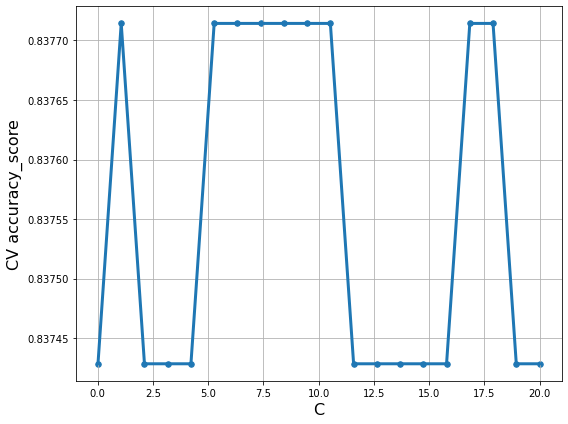

Best C {'C': 1.0621052631578947}


In [54]:
C = clf_cv.cv_results_['param_C'].data
scores = clf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('C', fontsize=16)
plt.ylabel('CV accuracy_score', fontsize=16)
plt.scatter(C, scores, s=30)
plt.plot(C, scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.01])
# plt.ylim([0.8, 1])

plt.tight_layout()
plt.show()

print('Best C', clf_cv.best_params_)

In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
clf = SVC(kernel = 'linear', C = 1.0621052631578947).fit(Xtrain, Ytrain)
print(accuracy_score(Ytest, clf.predict(Xtest)))
confusion_matrix(Ytest,clf.predict(Xtest))

0.844


array([[1105,   52],
       [ 182,  161]])

In [56]:
import time

def bootstrap_validation(test_data, test_label, train_label, models, metric, sample=500, random_state=66):
    tic = time.time()
    n_sample = sample
    n_model = len(models)
    output_array=np.zeros([n_sample, n_model])
    output_array[:]=np.nan
    print(output_array.shape)
    for model_idx in range(n_model):
        print('\nprocessing model', model_idx)
        for bs_iter in range(n_sample):
            bs_index = np.random.choice(test_data.index, len(test_data.index), replace=True)
            bs_data = test_data.loc[bs_index]
            bs_label = test_label[bs_index]
            bs_predicted = models[model_idx].predict(bs_data)
            output_array[bs_iter, model_idx]=metric(bs_label,bs_predicted)
            if bs_iter % 100 == 0:
                print('processing:', bs_iter, time.time()-tic, 's')
    output_df = pd.DataFrame(output_array)
    return output_df

In [57]:
tic = time.time()
bs_output = bootstrap_validation(Xtest,Ytest,Ytrain,[clf],
                                 metric = accuracy_score,
                                 sample = 1000)
print('time:', time.time()-tic, 's')
bs_output.rename(columns = {0:'SVM-Linear'})

(1000, 1)

processing model 0
processing: 0 0.0687251091003418 s
processing: 100 6.563836097717285 s
processing: 200 13.099476337432861 s
processing: 300 19.537389993667603 s
processing: 400 26.08492612838745 s
processing: 500 32.60323715209961 s
processing: 600 39.13803005218506 s
processing: 700 45.67172718048096 s
processing: 800 52.11331510543823 s
processing: 900 58.43799710273743 s
time: 64.68032217025757 s


,SVM-Linear
0,0.851333
1,0.848000
2,0.845333
3,0.830000
4,0.844000
...,...
995,0.851333
996,0.834000
997,0.846000
998,0.833333


The 95% confidence interval of accuracy is  [0.82533333 0.86266667] With mean accuracy 0.8441679999999985 Standard deviation 0.00959051605609534


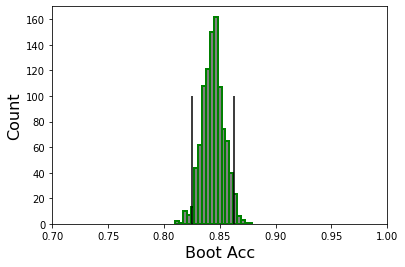

In [58]:
CI_acc = np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
mean_acc = np.mean(bs_output.iloc[:,0])
std_acc = np.std(bs_output.iloc[:,0])
fig,ax= plt.subplots()
print("The 95% confidence interval of accuracy is ",CI_acc,"With mean accuracy",mean_acc, "Standard deviation",std_acc)
#Plot Accuracy
ax.set_xlabel('Boot Acc', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color ="grey")
ax.set_xlim([0.7,1])
ax.vlines(x=CI_acc[0], ymin = 0, ymax =100, color = "black")
ax.vlines(x=CI_acc[1], ymin = 0, ymax =100, color = "black")

## SVM-Poly Kernel

In [59]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_values = {'C': np.linspace(0.01,20,20)}

tic = time.time()
clf = SVC(kernel = 'poly')
clf_cv = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy', cv=5, verbose=0)
clf_cv.fit(Xtrain, Ytrain)
toc = time.time()
print('time:', round(toc-tic),'s')

time: 26 s


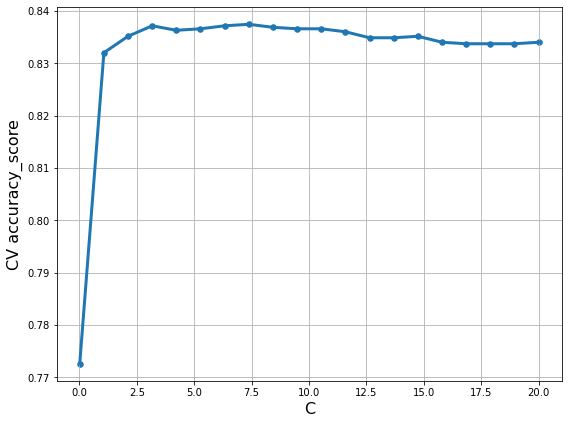

Best C {'C': 7.374736842105262}


In [60]:
C = clf_cv.cv_results_['param_C'].data
scores = clf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('C', fontsize=16)
plt.ylabel('CV accuracy_score', fontsize=16)
plt.scatter(C, scores, s=30)
plt.plot(C, scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.01])
# plt.ylim([0.8, 1])

plt.tight_layout()
plt.show()

print('Best C', clf_cv.best_params_)

In [61]:
from sklearn.metrics import accuracy_score
clf = SVC(kernel = 'poly', C = 7.374736842105262).fit(Xtrain, Ytrain)
print(accuracy_score(Ytest, clf.predict(Xtest)))
confusion_matrix(Ytest,clf.predict(Xtest))

0.8506666666666667


array([[1113,   44],
       [ 180,  163]])

In [62]:
tic = time.time()
bs_output = bootstrap_validation(Xtest,Ytest,Ytrain,[clf],
                                 metric = accuracy_score,
                                 sample = 1000)
print('time:', time.time()-tic, 's')
bs_output.rename(columns = {0:'SVM-Poly'})

(1000, 1)

processing model 0
processing: 0 0.07538318634033203 s
processing: 100 7.249972105026245 s
processing: 200 14.435924053192139 s
processing: 300 21.59224820137024 s
processing: 400 28.72607707977295 s
processing: 500 35.97762894630432 s
processing: 600 43.20569705963135 s
processing: 700 50.400413036346436 s
processing: 800 57.62420105934143 s
processing: 900 64.90984725952148 s
time: 72.1050431728363 s


,SVM-Poly
0,0.863333
1,0.844000
2,0.851333
3,0.859333
4,0.854000
...,...
995,0.855333
996,0.845333
997,0.849333
998,0.868667


The 95% confidence interval of accuracy is  [0.832   0.86735] With mean accuracy 0.8506486666666668 Standard deviation 0.00946108452791985


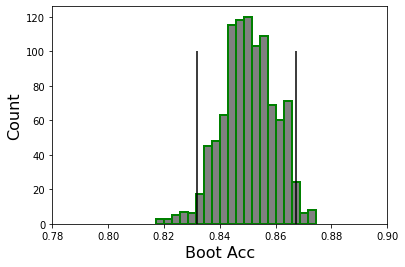

In [63]:
CI_acc = np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
mean_acc = np.mean(bs_output.iloc[:,0])
std_acc = np.std(bs_output.iloc[:,0])
fig,ax= plt.subplots()
print("The 95% confidence interval of accuracy is ",CI_acc,"With mean accuracy",mean_acc, "Standard deviation",std_acc)
#Plot Accuracy
ax.set_xlabel('Boot Acc', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color ="grey")
ax.set_xlim([0.78,0.9])
ax.vlines(x=CI_acc[0], ymin = 0, ymax =100, color = "black")
ax.vlines(x=CI_acc[1], ymin = 0, ymax =100, color = "black")

## SVM-RBF Kernel

In [64]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

grid_values = {'C': np.linspace(0.01,20,20)}

tic = time.time()
clf = SVC(kernel = 'rbf')
clf_cv = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy', cv=5, verbose=0)
clf_cv.fit(Xtrain, Ytrain)
toc = time.time()
print('time:', round(toc-tic),'s')

time: 32 s


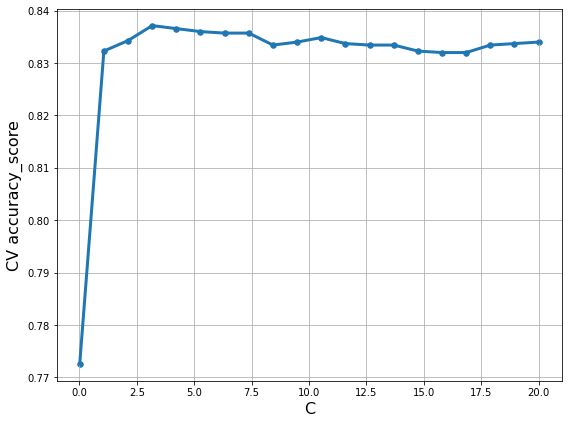

Best C {'C': 3.1663157894736838}


In [65]:
C = clf_cv.cv_results_['param_C'].data
scores = clf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('C', fontsize=16)
plt.ylabel('CV accuracy_score', fontsize=16)
plt.scatter(C, scores, s=30)
plt.plot(C, scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.01])
# plt.ylim([0.8, 1])

plt.tight_layout()
plt.show()

print('Best C', clf_cv.best_params_)

In [66]:
from sklearn.metrics import accuracy_score
clf = SVC(kernel = 'rbf', C = 3.1663157894736838).fit(Xtrain, Ytrain)
print(accuracy_score(Ytest, clf.predict(Xtest)))
confusion_matrix(Ytest,clf.predict(Xtest))

0.842


array([[1115,   42],
       [ 195,  148]])

In [67]:
tic = time.time()
bs_output = bootstrap_validation(Xtest,Ytest,Ytrain,[clf],
                                 metric = accuracy_score,
                                 sample = 1000)
print('time:', time.time()-tic, 's')
bs_output.rename(columns = {0:'SVM-RBF'})

(1000, 1)

processing model 0
processing: 0 0.21592211723327637 s
processing: 100 21.69857096672058 s
processing: 200 43.03128504753113 s
processing: 300 64.37419199943542 s
processing: 400 85.6806960105896 s
processing: 500 106.93821692466736 s
processing: 600 128.11541295051575 s
processing: 700 149.47802305221558 s
processing: 800 170.69197988510132 s
processing: 900 191.92799997329712 s
time: 212.9585120677948 s


,SVM-RBF
0,0.844667
1,0.853333
2,0.833333
3,0.842000
4,0.840667
...,...
995,0.840000
996,0.838667
997,0.850000
998,0.843333


The 95% confidence interval of accuracy is  [0.824   0.85935] With mean accuracy 0.8419359999999998 Standard deviation 0.009222889014716481


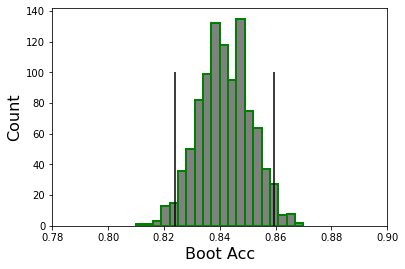

In [68]:
CI_acc = np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
mean_acc = np.mean(bs_output.iloc[:,0])
std_acc = np.std(bs_output.iloc[:,0])
fig,ax= plt.subplots()
print("The 95% confidence interval of accuracy is ",CI_acc,"With mean accuracy",mean_acc, "Standard deviation",std_acc)
#Plot Accuracy
ax.set_xlabel('Boot Acc', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color ="grey")
ax.set_xlim([0.78,0.9])
ax.vlines(x=CI_acc[0], ymin = 0, ymax =100, color = "black")
ax.vlines(x=CI_acc[1], ymin = 0, ymax =100, color = "black")

## Logistic Regression

In [69]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

grid_values = {'C': np.linspace(0, 1, 101)}

tic = time.time()
clf = LogisticRegression()
clf_cv = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy', cv=5, verbose=0)
clf_cv.fit(Xtrain, Ytrain)
toc = time.time()
print('time:', round(toc-tic),'s')

time: 38 s


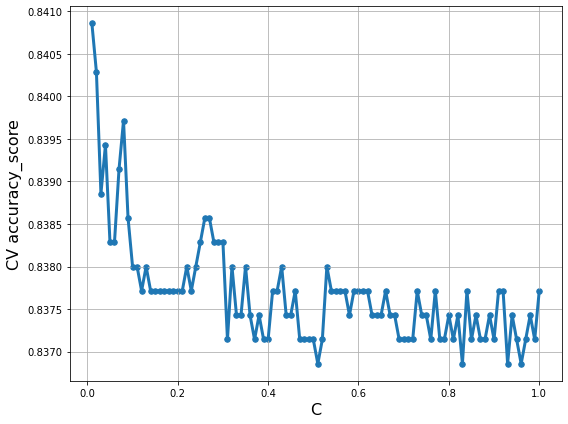

Best C {'C': 0.01}


In [70]:
C = clf_cv.cv_results_['param_C'].data
scores = clf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('C', fontsize=16)
plt.ylabel('CV accuracy_score', fontsize=16)
plt.scatter(C, scores, s=30)
plt.plot(C, scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.01])
# plt.ylim([0.8, 1])

plt.tight_layout()
plt.show()

print('Best C', clf_cv.best_params_)

In [71]:
from sklearn.metrics import accuracy_score
clf = LogisticRegression(C = 0.01).fit(Xtrain, Ytrain)
print(accuracy_score(Ytest, clf.predict(Xtest)))
confusion_matrix(Ytest,clf.predict(Xtest))

0.842


array([[1114,   43],
       [ 194,  149]])

In [72]:
tic = time.time()
bs_output = bootstrap_validation(Xtest,Ytest,Ytrain,[clf],
                                 metric = accuracy_score,
                                 sample = 1000)
print('time:', time.time()-tic, 's')
bs_output.rename(columns = {0:'Logistic Regression'})

(1000, 1)

processing model 0
processing: 0 0.0026581287384033203 s
processing: 100 0.1272289752960205 s
processing: 200 0.24356579780578613 s
processing: 300 0.3649008274078369 s
processing: 400 0.48230981826782227 s
processing: 500 0.6043820381164551 s
processing: 600 0.7259540557861328 s
processing: 700 0.8398280143737793 s
processing: 800 0.9617390632629395 s
processing: 900 1.0847387313842773 s
time: 1.2019391059875488 s


,Logistic Regression
0,0.843333
1,0.828000
2,0.832667
3,0.842667
4,0.832667
...,...
995,0.857333
996,0.852000
997,0.829333
998,0.848000


The 95% confidence interval of accuracy is  [0.82466667 0.86133333] With mean accuracy 0.8426793333333324 Standard deviation 0.009511505056742843


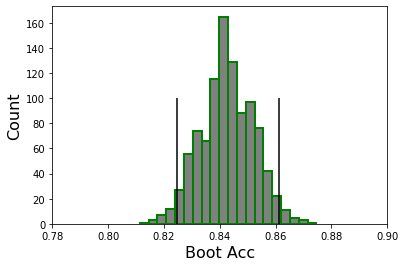

In [73]:
CI_acc = np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
mean_acc = np.mean(bs_output.iloc[:,0])
std_acc = np.std(bs_output.iloc[:,0])
fig,ax= plt.subplots()
print("The 95% confidence interval of accuracy is ",CI_acc,"With mean accuracy",mean_acc, "Standard deviation",std_acc)
#Plot Accuracy
ax.set_xlabel('Boot Acc', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color ="grey")
ax.set_xlim([0.78,0.9])
ax.vlines(x=CI_acc[0], ymin = 0, ymax =100, color = "black")
ax.vlines(x=CI_acc[1], ymin = 0, ymax =100, color = "black")

## CART

In [74]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.01, 101)}

tic = time.time()
clf = DecisionTreeClassifier()
clf_cv = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy', cv=5, verbose=0)
clf_cv.fit(Xtrain, Ytrain)
toc = time.time()
print('time:', round(toc-tic),'s')

time: 12 s


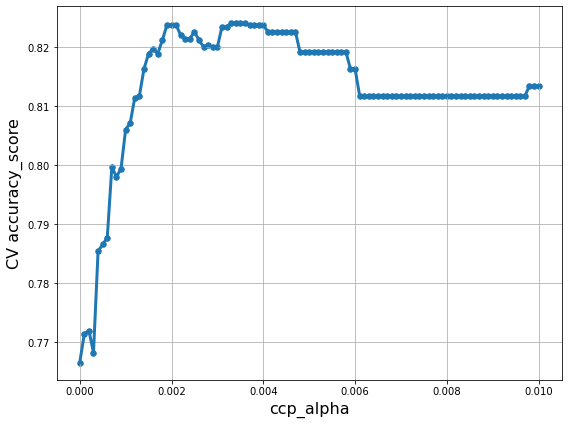

Best ccp_alpha {'ccp_alpha': 0.0033}


In [75]:
ccp_alpha = clf_cv.cv_results_['param_ccp_alpha'].data
scores = clf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV accuracy_score', fontsize=16)
plt.scatter(ccp_alpha, scores, s=30)
plt.plot(ccp_alpha, scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.01])
# plt.ylim([0.8, 1])

plt.tight_layout()
plt.show()

print('Best ccp_alpha', clf_cv.best_params_)

In [76]:
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(ccp_alpha = 0.0033).fit(Xtrain, Ytrain)
print(accuracy_score(Ytest, clf.predict(Xtest)))
confusion_matrix(Ytest,clf.predict(Xtest))

0.824


array([[1122,   35],
       [ 229,  114]])

In [77]:
tic = time.time()
bs_output = bootstrap_validation(Xtest,Ytest,Ytrain,[clf],
                                 metric = accuracy_score,
                                 sample = 1000)
print('time:', time.time()-tic, 's')
bs_output.rename(columns = {0:'CART'})

(1000, 1)

processing model 0
processing: 0 0.002400636672973633 s
processing: 100 0.11447381973266602 s
processing: 200 0.22918295860290527 s
processing: 300 0.34055566787719727 s
processing: 400 0.45401668548583984 s
processing: 500 0.56754469871521 s
processing: 600 0.681056022644043 s
processing: 700 0.7864856719970703 s
processing: 800 0.8957686424255371 s
processing: 900 1.0048797130584717 s
time: 1.110846996307373 s


,CART
0,0.828000
1,0.814000
2,0.839333
3,0.821333
4,0.814000
...,...
995,0.824000
996,0.819333
997,0.829333
998,0.808000


The 95% confidence interval of accuracy is  [0.806      0.84333333] With mean accuracy 0.824438000000001 Standard deviation 0.009498803456810288


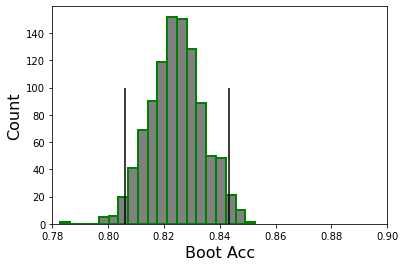

In [78]:
CI_acc = np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
mean_acc = np.mean(bs_output.iloc[:,0])
std_acc = np.std(bs_output.iloc[:,0])
fig,ax= plt.subplots()
print("The 95% confidence interval of accuracy is ",CI_acc,"With mean accuracy",mean_acc, "Standard deviation",std_acc)
#Plot Accuracy
ax.set_xlabel('Boot Acc', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color ="grey")
ax.set_xlim([0.78,0.9])
ax.vlines(x=CI_acc[0], ymin = 0, ymax =100, color = "black")
ax.vlines(x=CI_acc[1], ymin = 0, ymax =100, color = "black")

## Random Forest

In [79]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.01, 10)}

tic = time.time()
clf = RandomForestClassifier(n_estimators=500)
clf_cv = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy', cv=5, verbose=0)
clf_cv.fit(Xtrain, Ytrain)
toc = time.time()
print('time:', round(toc-tic),'s')

time: 104 s


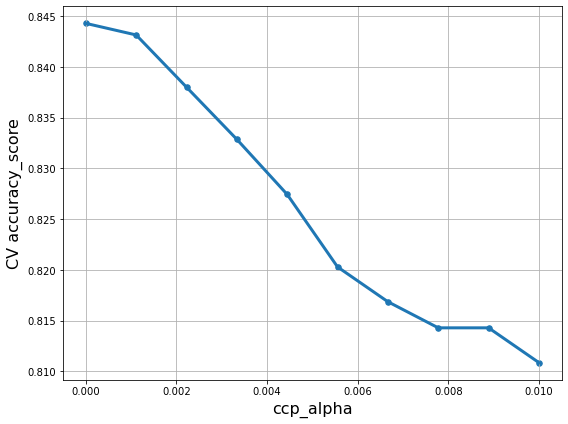

Best ccp_alpha {'ccp_alpha': 0.0}


In [80]:
ccp_alpha = clf_cv.cv_results_['param_ccp_alpha'].data
scores = clf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV accuracy_score', fontsize=16)
plt.scatter(ccp_alpha, scores, s=30)
plt.plot(ccp_alpha, scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.01])
# plt.ylim([0.8, 1])

plt.tight_layout()
plt.show()

print('Best ccp_alpha', clf_cv.best_params_)

In [81]:
from sklearn.metrics import accuracy_score
clf = RandomForestClassifier(ccp_alpha = 0.0).fit(Xtrain, Ytrain)
print(accuracy_score(Ytest, clf.predict(Xtest)))
confusion_matrix(Ytest,clf.predict(Xtest))

0.8526666666666667


array([[1115,   42],
       [ 179,  164]])

In [82]:
tic = time.time()
bs_output = bootstrap_validation(Xtest,Ytest,Ytrain,[clf],
                                 metric = accuracy_score,
                                 sample = 1000)
print('time:', time.time()-tic, 's')
bs_output.rename(columns = {0:'Random Forest'})

(1000, 1)

processing model 0
processing: 0 0.02374124526977539 s
processing: 100 2.1641221046447754 s
processing: 200 4.206992149353027 s
processing: 300 6.2084550857543945 s
processing: 400 8.144779920578003 s
processing: 500 10.095315933227539 s
processing: 600 12.051844120025635 s
processing: 700 13.99622392654419 s
processing: 800 15.936277866363525 s
processing: 900 17.862144947052002 s
time: 19.75495481491089 s


,Random Forest
0,0.849333
1,0.833333
2,0.844667
3,0.860000
4,0.855333
...,...
995,0.866000
996,0.861333
997,0.846000
998,0.851333


The 95% confidence interval of accuracy is  [0.832 0.87 ] With mean accuracy 0.8523186666666658 Standard deviation 0.009478478921571028


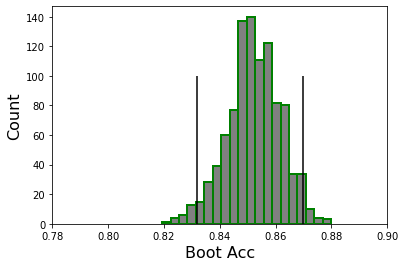

In [83]:
CI_acc = np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
mean_acc = np.mean(bs_output.iloc[:,0])
std_acc = np.std(bs_output.iloc[:,0])
fig,ax= plt.subplots()
print("The 95% confidence interval of accuracy is ",CI_acc,"With mean accuracy",mean_acc, "Standard deviation",std_acc)
#Plot Accuracy
ax.set_xlabel('Boot Acc', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color ="grey")
ax.set_xlim([0.78,0.9])
ax.vlines(x=CI_acc[0], ymin = 0, ymax =100, color = "black")
ax.vlines(x=CI_acc[1], ymin = 0, ymax =100, color = "black")

## Gradient Boosting Tree

In [84]:
import time
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

grid_values = {'ccp_alpha': np.linspace(0, 0.01, 10)}

tic = time.time()
clf = GradientBoostingClassifier(n_estimators=500)
clf_cv = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy', cv=5, verbose=0)
clf_cv.fit(Xtrain, Ytrain)
toc = time.time()
print('time:', round(toc-tic),'s')

time: 139 s


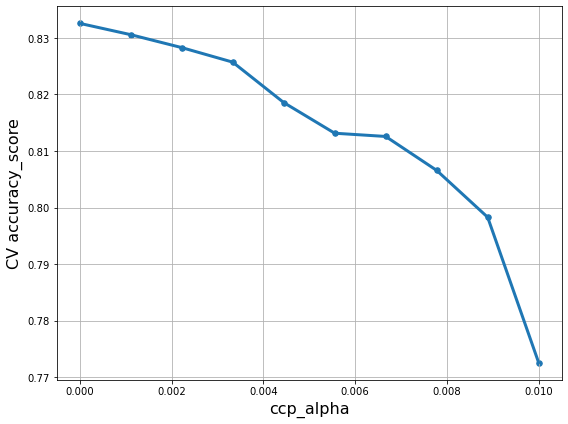

Best ccp_alpha {'ccp_alpha': 0.0}


In [85]:
ccp_alpha = clf_cv.cv_results_['param_ccp_alpha'].data
scores = clf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('ccp_alpha', fontsize=16)
plt.ylabel('CV accuracy_score', fontsize=16)
plt.scatter(ccp_alpha, scores, s=30)
plt.plot(ccp_alpha, scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.01])
# plt.ylim([0.8, 1])

plt.tight_layout()
plt.show()

print('Best ccp_alpha', clf_cv.best_params_)

In [86]:
from sklearn.metrics import accuracy_score
clf = GradientBoostingClassifier(ccp_alpha = 0.0).fit(Xtrain, Ytrain)
print(accuracy_score(Ytest, clf.predict(Xtest)))
confusion_matrix(Ytest,clf.predict(Xtest))

0.8513333333333334


array([[1102,   55],
       [ 168,  175]])

In [87]:
tic = time.time()
bs_output = bootstrap_validation(Xtest,Ytest,Ytrain,[clf],
                                 metric = accuracy_score,
                                 sample = 1000)
print('time:', time.time()-tic, 's')
bs_output.rename(columns = {0:'Gradient Boosting'})

(1000, 1)

processing model 0
processing: 0 0.0044422149658203125 s
processing: 100 0.29665517807006836 s
processing: 200 0.6427130699157715 s
processing: 300 0.9434082508087158 s
processing: 400 1.2372932434082031 s
processing: 500 1.5368051528930664 s
processing: 600 1.814634084701538 s
processing: 700 2.0976510047912598 s
processing: 800 2.391953229904175 s
processing: 900 2.684612274169922 s
time: 2.972226142883301 s


,Gradient Boosting
0,0.864667
1,0.848000
2,0.860000
3,0.855333
4,0.848000
...,...
995,0.842667
996,0.862667
997,0.852667
998,0.847333


The 95% confidence interval of accuracy is  [0.83066667 0.87      ] With mean accuracy 0.851251333333333 Standard deviation 0.009683752050614352


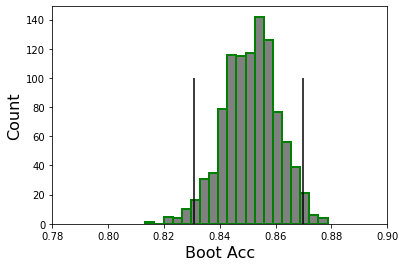

In [88]:
CI_acc = np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
mean_acc = np.mean(bs_output.iloc[:,0])
std_acc = np.std(bs_output.iloc[:,0])
fig,ax= plt.subplots()
print("The 95% confidence interval of accuracy is ",CI_acc,"With mean accuracy",mean_acc, "Standard deviation",std_acc)
#Plot Accuracy
ax.set_xlabel('Boot Acc', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color ="grey")
ax.set_xlim([0.78,0.9])
ax.vlines(x=CI_acc[0], ymin = 0, ymax =100, color = "black")
ax.vlines(x=CI_acc[1], ymin = 0, ymax =100, color = "black")

## XGBoost

In [89]:
# learning rate
import time
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

grid_values = {'learning_rate': np.logspace(-2, 0, 10)}

tic = time.time()
clf = XGBClassifier(n_estimators=500, eval_metric = 'logloss')
clf_cv = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy', cv=5, verbose=0)
clf_cv.fit(Xtrain, Ytrain)
toc = time.time()
print('time:', round(toc-tic),'s')

time: 97 s


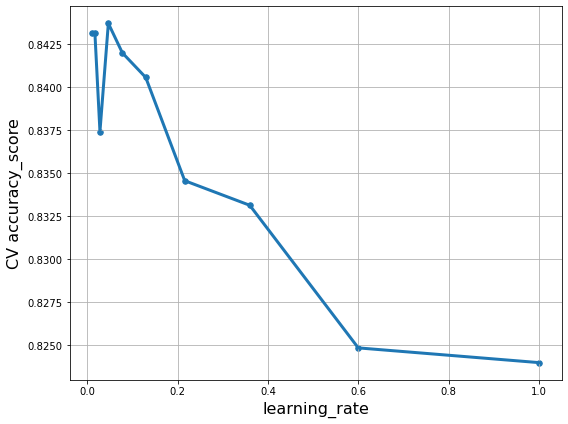

Best learning_rate {'learning_rate': 0.046415888336127774}


In [90]:
learning_rate = clf_cv.cv_results_['param_learning_rate'].data
scores = clf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('learning_rate', fontsize=16)
plt.ylabel('CV accuracy_score', fontsize=16)
plt.scatter(learning_rate, scores, s=30)
plt.plot(learning_rate, scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.01])
# plt.ylim([0.8, 1])

plt.tight_layout()
plt.show()

print('Best learning_rate', clf_cv.best_params_)

In [91]:
# max_depth
import time
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

grid_values = {'max_depth': range(1,20)}

tic = time.time()
clf = XGBClassifier(n_estimators=500, eval_metric = 'logloss')
clf_cv = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy', cv=5, verbose=0)
clf_cv.fit(Xtrain, Ytrain)
toc = time.time()
print('time:', round(toc-tic),'s')

time: 166 s


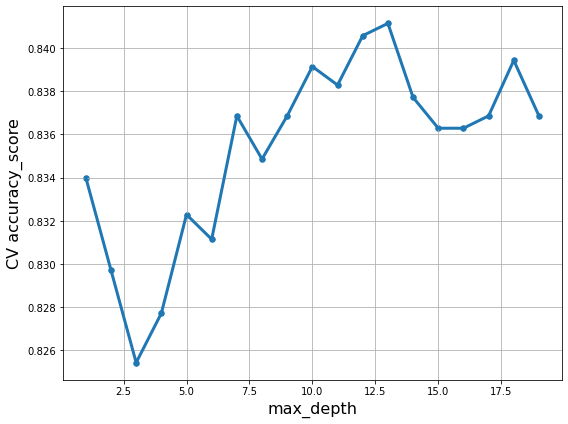

Best max_depth {'max_depth': 13}


In [92]:
max_depth = clf_cv.cv_results_['param_max_depth'].data
scores = clf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max_depth', fontsize=16)
plt.ylabel('CV accuracy_score', fontsize=16)
plt.scatter(max_depth, scores, s=30)
plt.plot(max_depth, scores, linewidth=3)
plt.grid(True, which='both')
# plt.xlim([0, 0.01])
# plt.ylim([0.8, 1])

plt.tight_layout()
plt.show()

print('Best max_depth', clf_cv.best_params_)

In [93]:
import time
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier

grid_values = {'learning_rate': np.logspace(-2, 0, 20)
              ,'max_depth': range(1,10)
              }

tic = time.time()
clf = XGBClassifier(n_estimators=500, eval_metric = 'logloss')
clf_cv = GridSearchCV(clf, param_grid=grid_values, scoring='accuracy', cv=5, verbose=0)
clf_cv.fit(Xtrain, Ytrain)
toc = time.time()
print('time:', round(toc-tic),'s')
print('Best learning_rate', clf_cv.best_params_)

time: 1308 s
Best learning_rate {'learning_rate': 0.016237767391887217, 'max_depth': 5}


In [94]:
from sklearn.metrics import accuracy_score
clf = XGBClassifier(n_estimators=500
                    ,eval_metric = 'logloss'
                    ,learning_rate = 0.016237767391887217
                    ,max_depth = 4).fit(Xtrain, Ytrain)
print(accuracy_score(Ytest, clf.predict(Xtest)))
confusion_matrix(Ytest,clf.predict(Xtest))

0.858


array([[1111,   46],
       [ 167,  176]])

In [95]:
print('time:', round(time.time()-time_start),'s')

time: 2548 s


In [96]:
tic = time.time()
bs_output = bootstrap_validation(Xtest,Ytest,Ytrain,[clf],
                                 metric = accuracy_score,
                                 sample = 1000)
print('time:', time.time()-tic, 's')
bs_output.rename(columns = {0:'XGBoost'})

(1000, 1)

processing model 0
processing: 0 0.00835728645324707 s
processing: 100 0.5920262336730957 s
processing: 200 1.1838011741638184 s
processing: 300 1.7814950942993164 s
processing: 400 2.358549118041992 s
processing: 500 2.9494752883911133 s
processing: 600 3.538374185562134 s
processing: 700 4.140760183334351 s
processing: 800 4.738996982574463 s
processing: 900 5.323794364929199 s
time: 5.91718602180481 s


,XGBoost
0,0.866000
1,0.858667
2,0.857333
3,0.855333
4,0.836000
...,...
995,0.844667
996,0.858000
997,0.858000
998,0.858000


The 95% confidence interval of accuracy is  [0.83866667 0.87466667] With mean accuracy 0.8574546666666654 Standard deviation 0.009210546515332886


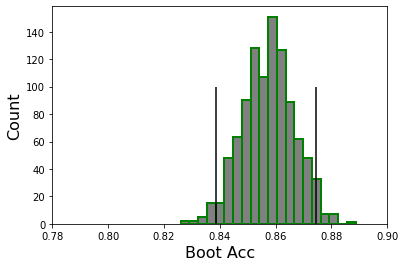

In [97]:
CI_acc = np.quantile(bs_output.iloc[:,0],np.array([0.025,0.975]))
mean_acc = np.mean(bs_output.iloc[:,0])
std_acc = np.std(bs_output.iloc[:,0])
fig,ax= plt.subplots()
print("The 95% confidence interval of accuracy is ",CI_acc,"With mean accuracy",mean_acc, "Standard deviation",std_acc)
#Plot Accuracy
ax.set_xlabel('Boot Acc', fontsize=16)
ax.set_ylabel('Count', fontsize=16)
ax.hist(bs_output.iloc[:,0], bins=20,edgecolor='green', linewidth=2,color ="grey")
ax.set_xlim([0.78,0.9])
ax.vlines(x=CI_acc[0], ymin = 0, ymax =100, color = "black")
ax.vlines(x=CI_acc[1], ymin = 0, ymax =100, color = "black")